# Imports

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Data

In [52]:
train = pd.read_csv('../../data/titanic/train.csv')
test  = pd.read_csv('../../data/titanic/test.csv')

full = pd.concat([train, test])

# Missing values

In [53]:
for col in full.columns:
    if any(full[col].isnull()):
        print("{} NaN".format(col), sum(full[col].isnull()))
    
print("\nTotal", len(full))

Age NaN 263
Cabin NaN 1014
Embarked NaN 2
Fare NaN 1
Survived NaN 418

Total 1309


### Quick Review

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


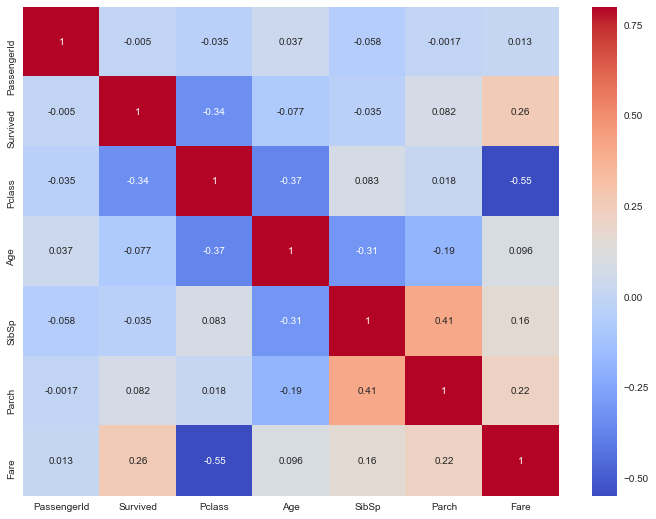

In [56]:
f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(train.corr(), vmax=.8, cmap = "coolwarm", annot=True)

### Survival by gender

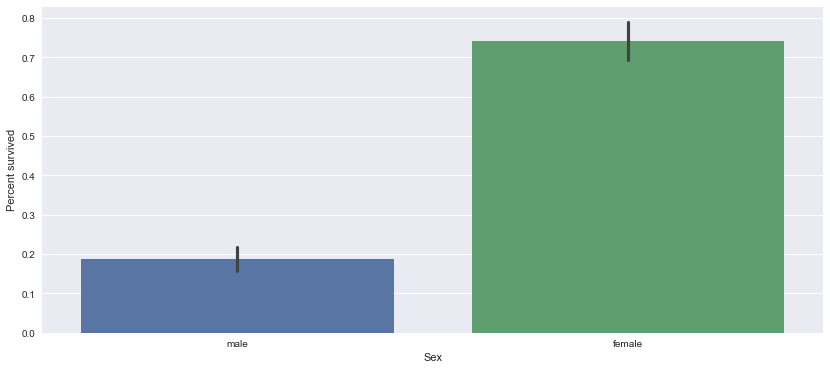

In [57]:
sns.set(rc={'figure.figsize':(14, 6)})

g = sns.barplot(x="Sex",y="Survived",data=train)
_ = g.set_ylabel("Percent survived")

### Survival by class

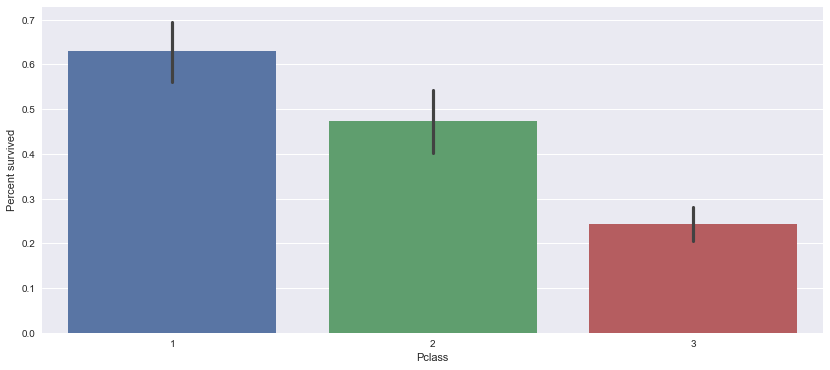

In [58]:
g = sns.barplot(x="Pclass",y="Survived",data=train)
_ = g.set_ylabel("Percent survived")

### Survival by parch

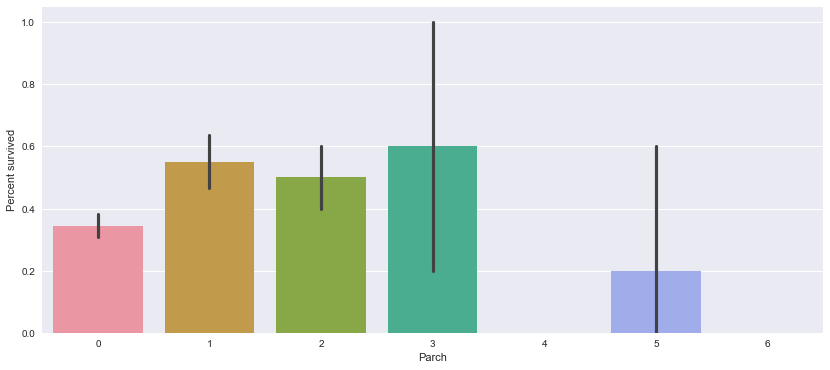

In [59]:
g = sns.barplot(x="Parch",y="Survived",data=train)
_ = g.set_ylabel("Percent survived")

### Survival by sibs

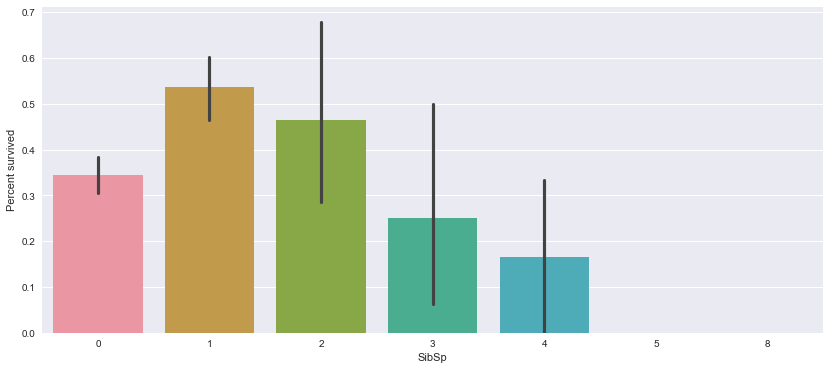

In [60]:
g = sns.barplot(x="SibSp",y="Survived",data=train)
_ = g.set_ylabel("Percent survived")

### Survival by Embarking location

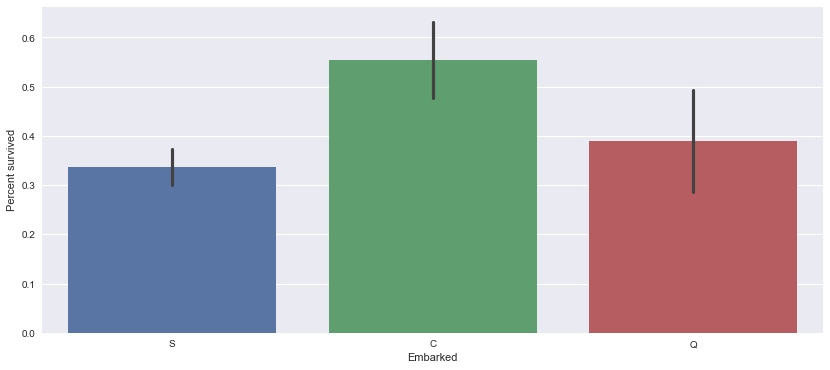

In [61]:
g = sns.barplot(x="Embarked",y="Survived",data=train)
_ = g.set_ylabel("Percent survived")

### Survival by Age

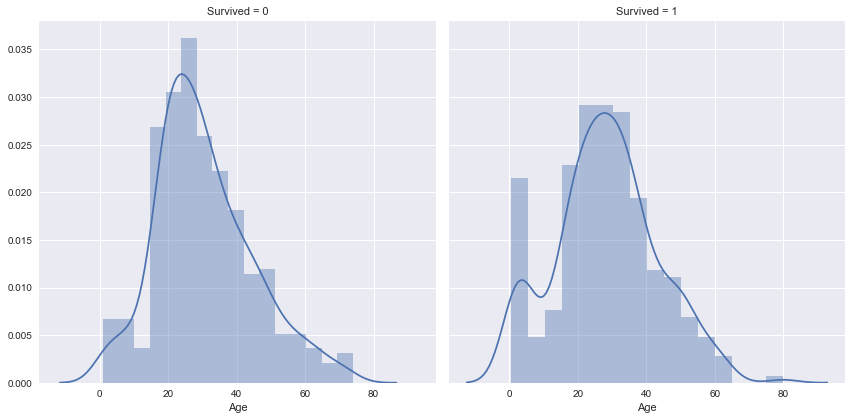

In [62]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived', size=6)
_ = g.map(sns.distplot, "Age")

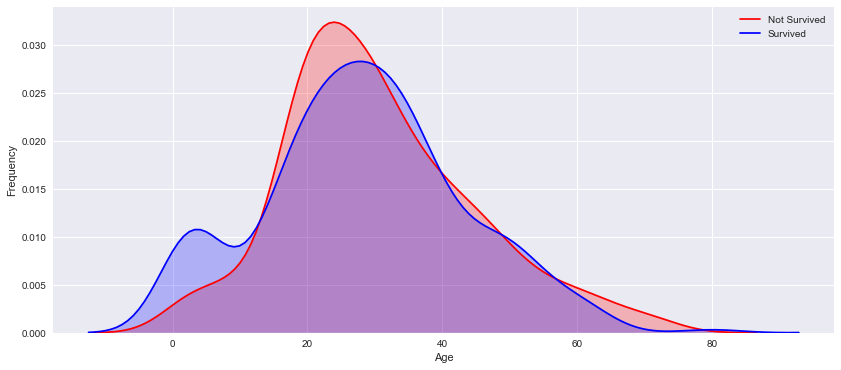

In [63]:
# Directly from Yassine's work
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### Fare

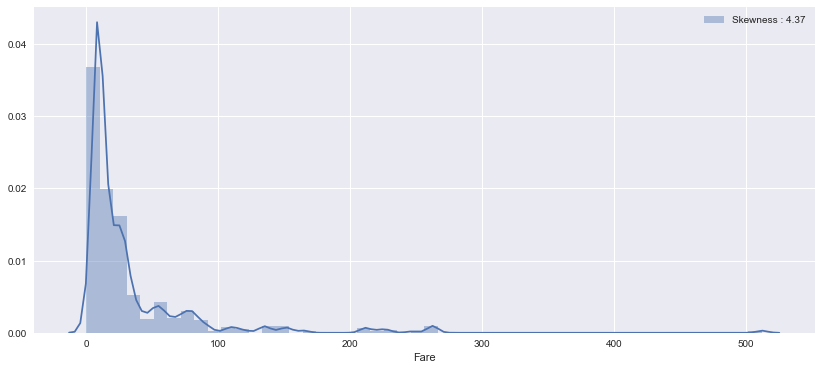

In [66]:
# There's one missing Fare value, replace it with the median of the class
full["Fare"].fillna(full.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# Explore Fare distribution
g = sns.distplot(full["Fare"], label="Skewness : %.2f"%(full["Fare"].skew()))
_ = g.legend(loc="best")